In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [22]:
min_age, max_age = 18, 65
min_income, max_income = 15000, 100000

df = pd.DataFrame(columns=['Age', 'Annual Income'])

for i in range(100):
    age = random.randint(min_age, max_age)
    
    # second term in the below equation is used to give older people, higher income
    income = random.randint(min_income, max_income) + (age - min_age) * 3000
    
    df.loc[i] = [age, income]

print(df)

    Age  Annual Income
0    37         109434
1    50         146927
2    22         101881
3    63         225473
4    42          90536
..  ...            ...
95   23         104614
96   64         191859
97   61         186067
98   35          74860
99   47         113708

[100 rows x 2 columns]


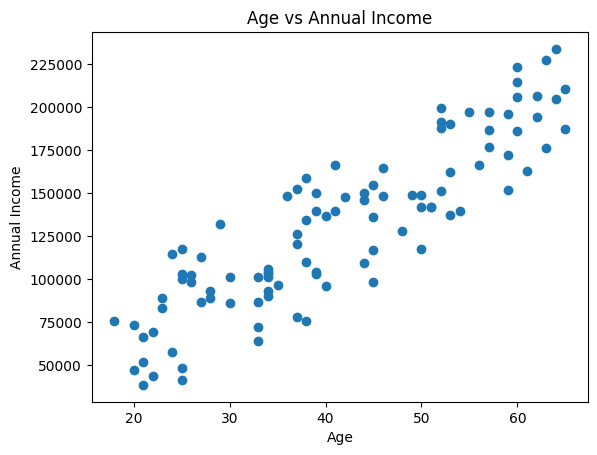

In [3]:
ages = df['Age'].values
incomes = df['Annual Income'].values

plt.scatter(ages, incomes)

plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age vs Annual Income')

plt.show()

In [37]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming you have already created the DataFrame 'df' with columns 'Age' and 'Annual Income'

# Extract the values from the 'Age' and 'Annual Income' columns
data = df[['Age', 'Annual Income']].values

# Calculate the pairwise distances between points using Euclidean distance
distances = pdist(data, metric='euclidean')
print()
print(distances)

# # Perform Agglomerative Hierarchical Clustering using Single Linkage
# linkage_matrix = linkage(distances, method='single')

# # Plot the dendrogram to visualize the clustering
# dendrogram(linkage_matrix, labels=np.arange(len(df)), orientation='top')

# # Set the labels and title of the plot
# plt.xlabel('Data Points')
# plt.ylabel('Distance')
# plt.title('Agglomerative Hierarchical Clustering Dendrogram')

# # Display the plot
# plt.show()

(100, 2)
[49565.0001614  25596.00281294 28779.00293617 ... 18659.00171499
 28294.00213826 46953.00009584]


In [25]:
n = df.shape[0]
distance_matrix = np.zeros((n,n))
clusters = {}
clusters_removed = set()

for i in range(n):
    # here I am creating initial version of the clusters
    x1, y1 = df.iloc[i]['Age'], df.iloc[i]['Annual Income']
    clusters[i] = [[x1, y1]]
    for j in range(i + 1, n):
        x2, y2 = df.iloc[j]['Age'], df.iloc[j]['Annual Income']
        
        distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        distance_matrix[i][j] = distance
        distance_matrix[j][i] = distance

while len(clusters) > 1:
    # find which clusters that should be joined
    n = distance_matrix.shape[0]
    min_single_link = float("inf")
    clusters_to_be_joined = []
    for i in range(n):
        for j in range(i+1, n):
            # we check if we have previously merged this cluster into some other cluster
            if i not in clusters_removed and j not in clusters_removed:
                if distance_matrix[i][j] < min_single_link and distance_matrix[i][j] != 0:
                    min_single_link = distance_matrix[i][j]
                    clusters_to_be_joined = [[i,j]]
                elif distance_matrix[i][j] == min_single_link and distance_matrix[i][j] != 0:
                    # one more cluster join in this iteration
                    clusters_to_be_joined.append([i, j])

    # joining the clusters and updating the distance_matrix
#     print('ITERATION')
    for cluster_pair in clusters_to_be_joined:
        # let's try to figure out the order of clusters
        if cluster_pair[0] < cluster_pair[1]:
            new_cluster_index, cluster_to_be_removed = cluster_pair[0], cluster_pair[1]
        else:
            new_cluster_index, cluster_to_be_removed = cluster_pair[1], cluster_pair[0]
        
        # first let's check that we did not previously merged this cluster to another cluster
        # that is possible in the case of one cluster being in more than one cluster pair
        # that is where 2 or more clusters had the same distance from a cluster
        if cluster_to_be_removed not in clusters:
            cluster_to_be_removed = joined_to
        
        # let's put the members of the cluster to be removed into the cluster that will stay
        for data_instance in clusters[cluster_to_be_removed]:
            clusters[new_cluster_index].append(data_instance)
        
        # remove the cluster
        clusters.pop(cluster_to_be_removed)
        # if it is also a pair for another cluster with the same distance
        # we mark the deleted cluster to be in the cluster we joined it to
        joined_to = new_cluster_index
        
        # update the distance matrix table
        for i in range(distance_matrix.shape[0]):
            if i != new_cluster_index and i != cluster_to_be_removed:
                distance1 = distance_matrix[i][new_cluster_index]
                distance2 = distance_matrix[i][cluster_to_be_removed]
                # take the minimum distance to the joined clusters
                distance = min(distance1, distance2)
                distance_matrix[i][new_cluster_index] = distance
                distance_matrix[new_cluster_index][i] = distance
                
#         # now we can remove the distances to the removed cluster

#         distance_matrix = np.delete(distance_matrix, cluster_to_be_removed, axis=0)
#         distance_matrix = np.delete(distance_matrix, cluster_to_be_removed, axis=1)
        
        # we keep track of the deleted clusters
        clusters_removed.add(cluster_to_be_removed)
        print(cluster_to_be_removed)

85
98
97
36
52
41
46
44
73
84
91
68
27
25
65
59
32
33
86
74
93
11
88
90
87
99
51
94
16
48
79
82
49
39
9
83
92
72
96
80
69
56
38
42
53
67
37
31
34
30
13
47
21
77
12
26
66
43
81
75
61
63
18
64
54
8
17
70
15
62
22
28
78
55
7
50
95
20
40
57
76
5
1
23
60
19
71
58
4
14
2
6
10
45
35
89
29
3
24


In [20]:
import pandas as pd

data = {
    'x': [1, 2, 3, 2, 5],
    'y': [1, 1, 4, 3, 3]
}

df = pd.DataFrame(data)
print(df)

n = df.shape[0]
distance_matrix = np.zeros((n,n))
clusters = {}
clusters_removed = set()

for i in range(n):
    # here I am creating initial version of the clusters
    x1, y1 = df.iloc[i]['x'], df.iloc[i]['y']
    clusters[i] = [[x1, y1]]
    for j in range(i + 1, n):
        x2, y2 = df.iloc[j]['x'], df.iloc[j]['y']
        
        distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        distance_matrix[i][j] = distance
        distance_matrix[j][i] = distance

print(clusters)
while len(clusters) > 1:
    # find which clusters that should be joined
    n = distance_matrix.shape[0]
    min_single_link = float("inf")
    clusters_to_be_joined = []
    for i in range(n):
        for j in range(i+1, n):
            # we check if we have previously merged this cluster into some other cluster
            if i not in clusters_removed and j not in clusters_removed:
                if distance_matrix[i][j] < min_single_link and distance_matrix[i][j] != 0:
                    min_single_link = distance_matrix[i][j]
                    clusters_to_be_joined = [[i,j]]
                elif distance_matrix[i][j] == min_single_link and distance_matrix[i][j] != 0:
                    # one more cluster join in this iteration
                    clusters_to_be_joined.append([i, j])

    # joining the clusters and updating the distance_matrix
    print('ITERATION')
    for cluster_pair in clusters_to_be_joined:
        # let's try to figure out the order of clusters
        if cluster_pair[0] < cluster_pair[1]:
            new_cluster_index, cluster_to_be_removed = cluster_pair[0], cluster_pair[1]
        else:
            new_cluster_index, cluster_to_be_removed = cluster_pair[1], cluster_pair[0]
        
        # first let's check that we did not previously merged this cluster to another cluster
        # that is possible in the case of one cluster being in more than one cluster pair
        # that is where 2 or more clusters had the same distance from a cluster
        if cluster_to_be_removed not in clusters:
            cluster_to_be_removed = joined_to
        
        # let's put the members of the cluster to be removed into the cluster that will stay
        for data_instance in clusters[cluster_to_be_removed]:
            clusters[new_cluster_index].append(data_instance)
        
        # remove the cluster
        clusters.pop(cluster_to_be_removed)
        # if it is also a pair for another cluster with the same distance
        # we mark the deleted cluster to be in the cluster we joined it to
        joined_to = new_cluster_index
        
        # update the distance matrix table
        for i in range(distance_matrix.shape[0]):
            if i != new_cluster_index and i != cluster_to_be_removed:
                distance1 = distance_matrix[i][new_cluster_index]
                distance2 = distance_matrix[i][cluster_to_be_removed]
                # take the minimum distance to the joined clusters
                distance = min(distance1, distance2)
                distance_matrix[i][new_cluster_index] = distance
                distance_matrix[new_cluster_index][i] = distance
                
#         # now we can remove the distances to the removed cluster

#         distance_matrix = np.delete(distance_matrix, cluster_to_be_removed, axis=0)
#         distance_matrix = np.delete(distance_matrix, cluster_to_be_removed, axis=1)
        
        # we keep track of the deleted clusters
        clusters_removed.add(cluster_to_be_removed)
        print(clusters)

   x  y
0  1  1
1  2  1
2  3  4
3  2  3
4  5  3
{0: [[1, 1]], 1: [[2, 1]], 2: [[3, 4]], 3: [[2, 3]], 4: [[5, 3]]}
ITERATION
{0: [[1, 1], [2, 1]], 2: [[3, 4]], 3: [[2, 3]], 4: [[5, 3]]}
ITERATION
{0: [[1, 1], [2, 1]], 2: [[3, 4], [2, 3]], 4: [[5, 3]]}
ITERATION
{0: [[1, 1], [2, 1], [3, 4], [2, 3]], 4: [[5, 3]]}
ITERATION
{0: [[1, 1], [2, 1], [3, 4], [2, 3], [5, 3]]}
